# EDA

## PCA Dimensionality Reduction

MAY WANT TO MODIFY THE PCA PLOT TO SHOW FRAUD FROM TRAIN VS HOLDOUT

In [31]:
# from sklearn import datasets

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import offsetbox 

import collections
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn import manifold
import time

holdoutseed = 4

# Notebook tools:
#from termcolor import colored
# import warnings
# warnings.filterwarnings('ignore')
# warnings.filterwarnings("ignore", category=FutureWarning) 
# pd.options.display.max_columns = None

In [32]:
data = pd.read_csv("../data/creditcard.csv")
features = ['V%d' % number for number in range(1, 29)]


In [33]:
# create a 3 to 1 sampling of non-fraud to fraud

fraud = data[data['Class']==1]
SampleCount = 4 * len(fraud)
non_fraud = data[data['Class'] == 0].sample(SampleCount)
data_sampled = non_fraud.append([fraud])
X_sampled = data_sampled[features]
y_sampled = data_sampled['Class']

In [34]:
import matplotlib.colors as mcolors

In [35]:
def embedding_plot(X ,labels,title):
    '''
    Returns a plot of data X
    '''
    fig = plt.figure(figsize=(10,8))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=mcolors.ListedColormap(["lightgrey", "black"]), s=8) 
    plt.gca().set_facecolor((1, 1, 1))
    plt.xlabel('1st dimension')
    plt.ylabel('2nd dimension')
    plt.grid(False)
    plt.title(title, fontsize=24);
    fig.savefig("../images/PCA_visualization.png")

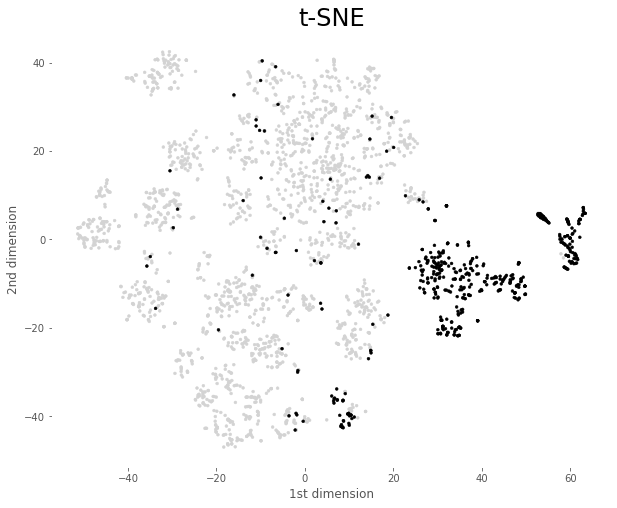

In [36]:
X_tsne = manifold.TSNE(n_components=2, 
                       init='pca',
                       perplexity=30,
                       learning_rate=200,
                       n_iter=500,
                       random_state=2).fit_transform(X_sampled)
embedding_plot(X_tsne, y_sampled,"t-SNE")

/Users/allanalberts/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


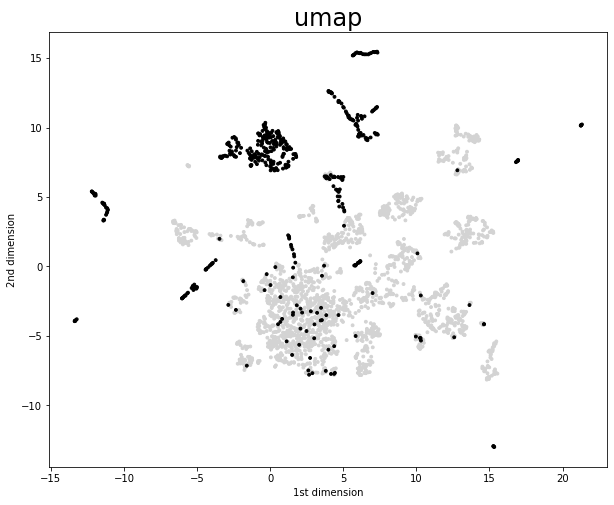

In [62]:
import umap

X_umap = umap.UMAP(n_neighbors=5, 
                   min_dist=0.4, 
                   n_components=2, 
                   random_state=2).fit_transform(X_sampled)
embedding_plot(X_umap, y_sampled,"umap")

Cummulative Total Explained Variance of first 10 components: 0.93


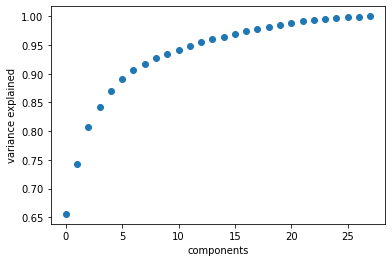

In [42]:
pca = decomposition.PCA(n_components=component_num)
pca.fit_transform(X_sampled)

x = range(0, X_sampled.shape[1])
y = np.cumsum(pca.explained_variance_ratio_)

fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_xlabel('components')
ax.set_ylabel('variance explained')
print(f'Cummulative Total Explained Variance of first 10 components: {np.sum(pca.explained_variance_ratio_[0:10]):.2f}')

In [69]:
data.groupby(target)[target].count()

,Class
Class,
0,284315
1,492


Cummulative Total Explained Variance of first             10 components:             0.93


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not         Class
155002      0
195278      0
251397      0
261392      0
149117      0
...       ...
279863      1
280143      1
280149      1
281144      1
281674      1

[2460 rows x 1 columns]

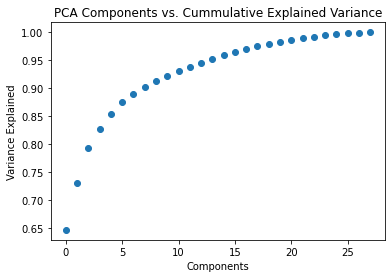

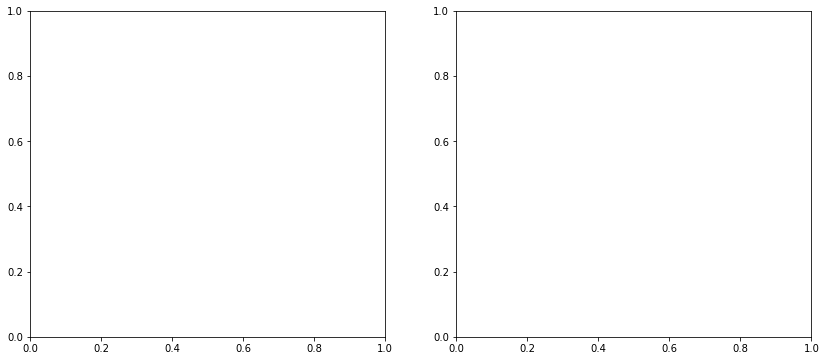

In [74]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import offsetbox 
import matplotlib.colors as mcolors

import collections
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn import manifold
import umap

holdoutseed = 4

def pca_sample_data(data, features, target):
    """
    Returns feature and target datasets with a 4 to 1 ratio of 
    non-fraud to fraud samples of the data. 
    """
    minority_class = data[data['Class'] == 1]
    SampleCount = 4 * len(minority_class)
    majority_class = data[data['Class'] == 0].sample(SampleCount)
    data_sampled = majority_class.append([minority_class])
    X_sampled = data_sampled[features]
    y_sampled = data_sampled[target]
    return X_sampled, y_sampled
    

def embedding_plot(ax, X ,labels,title):
    """
    Returns a plot of data X
    """
    
    ax.scatter(X[:, 0], X[:, 1], c=labels, cmap=mcolors.ListedColormap(["lightgrey", "black"]), s=8) 
    ax.gca().set_facecolor((1, 1, 1))
    ax.set_xlabel('1st dimension')
    ax.set_ylabel('2nd dimension')
    ax.grid(False)
    ax.set_title(title)
    ax.legend()

def pca_reduction(X_sampled):
    X_tsne = manifold.TSNE(n_components=2, 
                       init='pca',
                       perplexity=30,
                       learning_rate=200,
                       n_iter=500,
                       random_state=2).fit_transform(X_sampled)
    X_umap = umap.UMAP(n_neighbors=5, 
                   min_dist=0.4, 
                   n_components=2, 
                   random_state=2).fit_transform(X_sampled)
    return X_tsne, X_umap

def plot_cumm_pca(ax, X_sampled):
    pca = decomposition.PCA(n_components=component_num)
    pca.fit_transform(X_sampled)

    x = range(0, X_sampled.shape[1])
    y = np.cumsum(pca.explained_variance_ratio_)

    
    ax.scatter(x, y)
    ax.set_title("PCA Components vs. Cummulative Explained Variance")
    ax.set_xlabel('Components')
    ax.set_ylabel('Variance Explained')


data = pd.read_csv("../data/creditcard.csv")
features = ['V%d' % number for number in range(1, 29)]
target = ['Class']

X_sampled, y_sampled = pca_sample_data(data, features, target)

fig, ax = plt.subplots()
plot_cumm_pca(ax, X_sampled)
print(f'Cummulative Total Explained Variance of first \
            10 components: \
            {np.sum(pca.explained_variance_ratio_[0:10]):.2f}')

fig, axs = plt.subplots(1, 2, figsize=(14,6))
embedding_plot(axs[0], X_tsne, y_sampled, \
        "t-SNE 2D plot of Fraud vs. Non Fraud using PCA dimensionality reduction")
# embedding_plot(axs[1], X_umap, y_sampled,"umap")

In [3]:
import sys
sys.path.insert(0, '../src')
import helpers as h
import score_metrics as sm
import score_costs as sc
import eda_plots as ep
import smote_tuning as st
import feature_engineering as ef

#import pickle
import matplotlib.pyplot as plt

SEED = 123
CPU = -1
holdoutseed = 4
FOLDS = 5

FraudBudget=0.0005
ReviewCost=10
ChargebackFee=20

In [16]:
# Load data
X_train, X_test, \
y_train, y_test, \
c_train, c_test, \
X_holdout, y_holdout, c_holdout, \
features = h.load_data(4, engineered_features=False)

In [17]:
classifiers = h.load_classifier_dict("classifiers_ver21.pickle")

In [18]:
clf_lst = ['LR_smote','RF_smote','XGB_smote']
classifiers = sm.score_classifiers(clf_lst, classifiers, X_test, y_test)

In [22]:
# clf_lst = ['LR_smote','RF_smote','XGB_smote']
# for clf in clf_lst:
#     classifiers[clf]['clf_desc'] = classifiers[clf]['clf_desc'] + '_SMOTE'

In [24]:
clf_lst = ['LR', 'LR_smote','RF', 'RF_smote', 'XGB', 'XGB_smote']
colors = ['r', 'salmon', 'g', 'lightgreen', 'b', 'royalblue']          

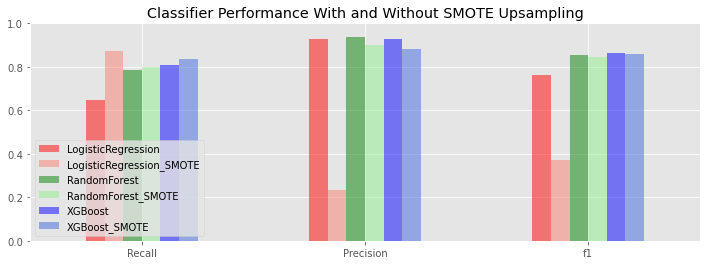

In [28]:
def plot_clf_metrics(ax, clf_lst, classifiers, score_type):
    """
    Plots the average cross validation score for each classifer for the metrics
    recall, precision, f1

    Parameters
    ----------
    ax: plot axis
    clf_lst: list
    classifiers: dictionary
    """
    recall = "Recall_score"
    precision = "Precision_score"
    f1 = "f1_score"
    title = ""
    if score_type == "CV":
        recall = "cvAvg_" + recall
        precision = "cvAvg_" + precision
        f1 = "cvAvg_" + f1
        title = "Average SMOTE Upsampled Score"
    if score_type == "test":
        recall = "test_" + recall
        precision = "test_" + precision
        f1 = "test_" + f1
        title = "Classifier Performance With and Without SMOTE Upsampling"

    colors = ['r', 'salmon', 'g', 'lightgreen', 'b', 'royalblue']
    clf_desc = []
    for clf in clf_lst:
#        colors.append(classifiers[clf]["c"])
        clf_desc.append(classifiers[clf]["clf_desc"])
    results = pd.DataFrame.from_dict(classifiers, 
                                    orient='index')[["clf_desc", 
                                                    recall,
                                                    precision,
                                                    f1]]   
    results = results.loc[clf_lst]
    results.set_index('clf_desc', inplace=True)
    
    results.columns = ["Recall", "Precision", "f1"] 
    results.T.plot(kind='bar', color=colors, alpha=0.5, rot=0, ax=ax)
    ax.set_title(title)
    ax.set_ylim(ymin=0, ymax=1.0);
    ax.grid('on', axis='y')
    ax.legend(loc='lower left')

fig, ax = plt.subplots(figsize=(12,4))
plot_clf_metrics(ax, clf_lst, classifiers, score_type="test")


In [30]:
fig.savefig("../images/SMOTE_score_comparison.png")

In [ ]:
filename = "../images/confusion_matrix_cost.png"

In [37]:
# Make function for indivisual plot and then you can call it over and over
def Plot_PR_Curve(k, X, y):
    '''
    Calculates and Plots PR Curve and puts threshold marker on curve.
    '''
    # get points to plot on the PR Curve
    classifiers[k]["precision"], classifiers[k]["recall"], classifiers[k]["thresholds"] = \
    precision_recall_curve(y, classifiers[k]["pred_prob"]) 
        
    # find the index of the record with closest threshold to desired threshold value
    classifiers[k]["threshold_idx"] = np.argmin(np.abs(classifiers[k]["thresholds"]-classifiers[k]["threshold"]))
    
    plt.plot(classifiers[k]["precision"], classifiers[k]["recall"], c=classifiers[k]["c"], label=k)
    plt.plot(classifiers[k]["precision"][classifiers[k]["threshold_idx"]], 
             classifiers[k]["recall"][classifiers[k]["threshold_idx"]], 'o', 
             markersize=10, fillstyle='full', 
             label="{:.2f} threshold".format(classifiers[k]["threshold"]), 
             c=classifiers[k]["c"], mew=2)

    plt.legend(loc='center', frameon=False)
    plt.title('Precision-Recall Curve Comparison')    
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.xlim(xmin=-0.05,xmax=1.05);
    plt.ylim(ymin=-0.05,ymax=1.05);  

KeyError: 'Voting'

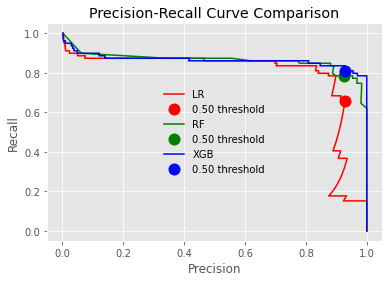

In [43]:
from sklearn.metrics import precision_recall_curve

clf_lst = ['LR_smote','RF_smote','XGB_smote']
clf_lst = ['LR','RF','XGB','Voting']
for k in clf_lst:
    Plot_PR_Curve(k, X_test, y_test)

In [42]:
classifiers["LR"]

{'clf_desc': 'LogisticRegression',
 'model': LogisticRegression(n_jobs=-1, random_state=123),
 'c': 'r',
 'cmap': <matplotlib.colors.LinearSegmentedColormap at 0x7fac22795990>,
 'threshold': 0.5,
 'pipeline': Pipeline(steps=[('Classifier',
                  LogisticRegression(n_jobs=-1, random_state=123))]),
 'cv_Recall_scores': array([0.79365079, 0.66666667, 0.53968254, 0.63492063, 0.50793651]),
 'cv_Precision_scores': array([0.94339623, 0.875     , 0.85      , 0.83333333, 0.82051282]),
 'cv_f1_scores': array([0.86206897, 0.75675676, 0.66019417, 0.72072072, 0.62745098]),
 'cvAvg_Recall_score': 0.6285714285714286,
 'cvAvg_Precision_score': 0.8644484760522497,
 'cvAvg_f1_score': 0.7254383196288314,
 'fitted_model': LogisticRegression(n_jobs=-1, random_state=123),
 'y_pred': array([0, 0, 0, ..., 0, 0, 0]),
 'test_Recall_score': 0.6455696202531646,
 'test_Precision_score': 0.9272727272727272,
 'test_f1_score': 0.7611940298507464,
 'pred_prob': array([1.25499902e-03, 2.24618298e-04, 7.1693